In [13]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## CNN in MNIST Data

In [14]:
# from tensorflow.keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import os, pickle
import numpy as np

data_dir = os.path.expanduser("~/.keras/datasets/cifar-10-batches-py-target")

def load_batch(filename):
    with open(os.path.join(data_dir, filename), "rb") as f:
        d = pickle.load(f, encoding="bytes")
    X = d[b"data"].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # (N,32,32,3)
    y = np.array(d[b"labels"]).reshape(-1, 1)  # <-- y shape (N,1) same as cifar10.load_data()
    return X, y

X_list, y_list = [], []
for i in range(1, 6):
    Xb, yb = load_batch(f"data_batch_{i}")
    X_list.append(Xb); y_list.append(yb)

X_train = np.concatenate(X_list)
y_train = np.concatenate(y_list)

X_test, y_test = load_batch("test_batch")

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


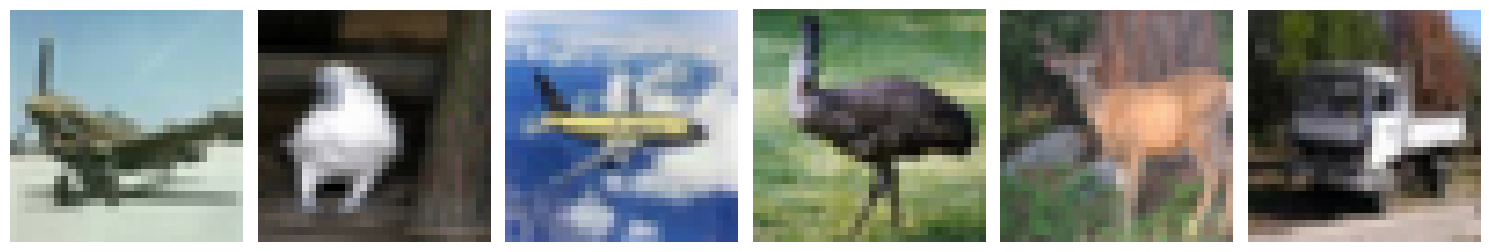

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0


## Model Defination

In [17]:
input_shape = X_train.shape[1:]

In [18]:
model = Sequential()

# Input Layer
model.add(Input(shape = input_shape))

# Convolution layer 1
model.add(Conv2D(filters = 6, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution layer 2
model.add(Conv2D(filters = 16, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

# Fully Connected layer
# Classification Head
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25)) # Dropout
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.compile(
    optimizer="Adam",
    loss = "sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,532 (189.58 KB)

 Trainable params: 48,532 (189.58 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2
)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3258 - loss: 1.8220 - val_accuracy: 0.4335 - val_loss: 1.5547
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4351 - loss: 1.5408 - val_accuracy: 0.4792 - val_loss: 1.4346
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4730 - loss: 1.4547 - val_accuracy: 0.4953 - val_loss: 1.3980
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4950 - loss: 1.4028 - val_accuracy: 0.5114 - val_loss: 1.3505
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5106 - loss: 1.3544 - val_accuracy: 0.5352 - val_loss: 1.2977
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5238 - loss: 1.3192 - val_accuracy: 0.5430 - val_loss: 1.2790
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5394 - loss: 1.2818 - val_accuracy: 0.5471 - val_loss: 1.2545
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5529 - loss: 1.2485 - 

In [21]:
import pandas as pd
df = pd.DataFrame(history.history)

<Axes: >

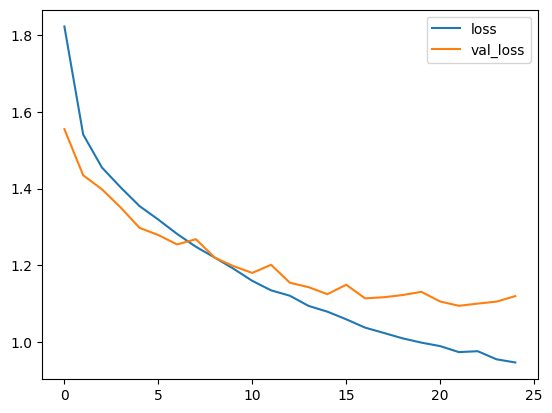

In [22]:
df[['loss','val_loss']].plot.line()

In [23]:
from sklearn.metrics import confusion_matrix

pred = np.argmax(model.predict(X_test), axis = 1)

confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[626,  23,  76,  28,  24,  17,  15,  16, 139,  36],
       [ 24, 706,  13,  22,  13,  11,  10,  15,  78, 108],
       [ 46,  10, 495,  84, 119, 115,  55,  33,  27,  16],
       [ 13,   7,  68, 428,  75, 265,  66,  38,  19,  21],
       [ 19,   4,  98,  91, 548,  74,  57,  73,  29,   7],
       [  6,   2,  80, 207,  54, 557,  31,  43,  16,   4],
       [  7,   7,  73, 103,  66,  57, 660,   7,  13,   7],
       [ 12,   3,  35,  71,  82, 111,  10, 638,   6,  32],
       [ 61,  38,  16,  28,  10,  13,   9,   4, 786,  35],
       [ 35, 109,  22,  45,   5,   9,   9,  20,  75, 671]])